Question 2

In [1]:
import pandas as pd
import polars as pl
import numpy as np

print(pl.__version__)

# data_path = r"C:\Users\LIUH0\Documents\mfe courses\quarter3\MachineLearning431\hw1\StockRetAcct_insample.dta"
data_path = r"C:\workspace\ext\cygwin\home\2013956\personal\machine_learning\hw1\StockRetAcct_insample.dta"
df = pd.read_stata(data_path)
df["ExRet"] = np.exp(df["lnAnnRet"]) - np.exp(df["lnRf"])
dl = pl.from_dataframe(df)
dl 

0.19.13


FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64
6.0,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0,0.3564
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097
6.0,1982,0.18663,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0,0.065553
6.0,1983,0.489819,0.08983,0.00017,-0.07178,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0,0.538032
10.0,1991,-0.508005,0.061216,0.000033,0.115204,1.341053,11.565831,0.239788,0.023147,0.300051,0.418764,0.146828,0.374368,-2.160942,10.0,-0.461433
12.0,2000,-1.356847,0.061977,0.000012,0.165238,0.251746,12.275754,-0.382327,-0.023783,-0.174606,0.824471,-0.591773,1.067196,-3.815523,6.0,-0.806467
15.0,1986,0.453034,0.062209,0.000136,null,null,12.740419,0.219266,null,null,0.779327,0.118562,null,null,3.0,0.508892
15.0,1987,-0.049553,0.066003,0.000183,null,0.337218,13.172914,0.219979,0.104938,0.046007,0.522232,0.127679,0.05877,-0.362636,3.0,-0.116576
15.0,1988,0.141739,0.072406,0.000193,0.160109,0.10825,13.123762,0.239861,0.119085,0.120877,0.541653,0.134526,0.142907,-0.228204,12.0,0.077184


In [2]:
dl.cast({"year": pl.Utf8}).cast({"year": pl.Int16})

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64
6.0,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0,0.3564
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097
6.0,1982,0.18663,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0,0.065553
6.0,1983,0.489819,0.08983,0.00017,-0.07178,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0,0.538032
10.0,1991,-0.508005,0.061216,0.000033,0.115204,1.341053,11.565831,0.239788,0.023147,0.300051,0.418764,0.146828,0.374368,-2.160942,10.0,-0.461433
12.0,2000,-1.356847,0.061977,0.000012,0.165238,0.251746,12.275754,-0.382327,-0.023783,-0.174606,0.824471,-0.591773,1.067196,-3.815523,6.0,-0.806467
15.0,1986,0.453034,0.062209,0.000136,null,null,12.740419,0.219266,null,null,0.779327,0.118562,null,null,3.0,0.508892
15.0,1987,-0.049553,0.066003,0.000183,null,0.337218,13.172914,0.219979,0.104938,0.046007,0.522232,0.127679,0.05877,-0.362636,3.0,-0.116576
15.0,1988,0.141739,0.072406,0.000193,0.160109,0.10825,13.123762,0.239861,0.119085,0.120877,0.541653,0.134526,0.142907,-0.228204,12.0,0.077184


In [3]:
dl = dl.drop_nulls("lnIssue").with_columns(pl.col("lnIssue").qcut(10, labels=[str(i) for i in range(1, 11)]).alias("qcut"))
dl 

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet,qcut
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64,cat
6.0,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0,0.3564,"""5"""
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097,"""6"""
6.0,1982,0.18663,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0,0.065553,"""2"""
6.0,1983,0.489819,0.08983,0.00017,-0.07178,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0,0.538032,"""2"""
10.0,1991,-0.508005,0.061216,0.000033,0.115204,1.341053,11.565831,0.239788,0.023147,0.300051,0.418764,0.146828,0.374368,-2.160942,10.0,-0.461433,"""7"""
12.0,2000,-1.356847,0.061977,0.000012,0.165238,0.251746,12.275754,-0.382327,-0.023783,-0.174606,0.824471,-0.591773,1.067196,-3.815523,6.0,-0.806467,"""8"""
15.0,1988,0.141739,0.072406,0.000193,0.160109,0.10825,13.123762,0.239861,0.119085,0.120877,0.541653,0.134526,0.142907,-0.228204,12.0,0.077184,"""8"""
15.0,1989,-0.01807,0.078056,0.000207,-0.012286,0.032554,13.305965,0.237256,0.100771,0.432045,0.843375,0.148894,0.062166,-0.293332,12.0,-0.09909,"""3"""
15.0,1990,-0.372159,0.07647,0.000164,-0.010896,-0.025881,13.148136,0.282474,0.134671,0.005042,1.085097,0.1947,0.113887,-0.332649,12.0,-0.390224,"""3"""


In [4]:
dl 

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet,qcut
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64,cat
6.0,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0,0.3564,"""5"""
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097,"""6"""
6.0,1982,0.18663,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0,0.065553,"""2"""
6.0,1983,0.489819,0.08983,0.00017,-0.07178,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0,0.538032,"""2"""
10.0,1991,-0.508005,0.061216,0.000033,0.115204,1.341053,11.565831,0.239788,0.023147,0.300051,0.418764,0.146828,0.374368,-2.160942,10.0,-0.461433,"""7"""
12.0,2000,-1.356847,0.061977,0.000012,0.165238,0.251746,12.275754,-0.382327,-0.023783,-0.174606,0.824471,-0.591773,1.067196,-3.815523,6.0,-0.806467,"""8"""
15.0,1988,0.141739,0.072406,0.000193,0.160109,0.10825,13.123762,0.239861,0.119085,0.120877,0.541653,0.134526,0.142907,-0.228204,12.0,0.077184,"""8"""
15.0,1989,-0.01807,0.078056,0.000207,-0.012286,0.032554,13.305965,0.237256,0.100771,0.432045,0.843375,0.148894,0.062166,-0.293332,12.0,-0.09909,"""3"""
15.0,1990,-0.372159,0.07647,0.000164,-0.010896,-0.025881,13.148136,0.282474,0.134671,0.005042,1.085097,0.1947,0.113887,-0.332649,12.0,-0.390224,"""3"""


In [10]:
# dl.select(["ExRet", "qcut"]).group_by("qcut").mean()
result_dl = None
for i in range(1981, 2015):
    temp_dl = dl.filter(pl.col("year") == i).drop_nulls("lnIssue").with_columns((-pl.col("lnIssue")).qcut(10, labels=[str(i) for i in range(1, 11)]).alias("qcut"))
    temp_dl = temp_dl.cast({"qcut": pl.Utf8})
    if result_dl is None:
        result_dl = temp_dl
    else:
        result_dl = pl.concat([result_dl, temp_dl])
result_dl

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet,qcut
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64,str
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097,"""5"""
50.0,1981,-0.362215,0.130199,0.000093,-0.037263,0.339044,11.667311,0.243628,0.146766,0.183164,0.79037,0.147756,0.150796,0.084959,3.0,-0.442922,"""10"""
120.0,1981,0.37296,0.130199,0.00054,0.300219,0.036303,13.427506,0.193899,0.200025,0.071841,0.970597,0.106679,0.044003,0.708901,8.0,0.312971,"""2"""
128.0,1981,-0.519226,0.130199,0.00144,0.168267,0.139604,14.407578,0.461742,0.149542,0.075114,0.831918,0.152359,0.085585,0.139065,4.0,-0.544074,"""3"""
135.0,1981,-0.768397,0.130199,0.000272,0.040192,0.104784,12.740149,0.20317,0.101146,0.024861,0.766497,0.066962,0.058133,0.795631,3.0,-0.675299,"""5"""
143.0,1981,-0.924644,0.130199,0.002769,0.243197,0.223243,15.061482,0.235058,0.168626,0.292767,0.769143,0.200616,0.126681,-0.303511,12.0,-0.742383,"""2"""
199.0,1981,0.076814,0.130199,0.001824,0.032098,0.061914,14.643783,0.288466,0.176307,0.07864,0.776593,0.233056,0.037514,-0.178874,1.0,-0.059214,"""6"""
206.0,1981,0.279154,0.130199,0.000686,0.046836,0.157236,13.665726,0.296064,0.176503,0.101794,0.481521,0.173882,0.083304,0.061986,7.0,0.182956,"""5"""
214.0,1981,-0.233593,0.130199,0.000617,-0.028694,0.437863,13.559172,0.140418,0.136242,0.050734,0.844184,0.069905,0.056126,0.487077,3.0,-0.347371,"""10"""


In [11]:
result_dl

FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ExRet,qcut
f32,i16,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64,str
6.0,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.08218,0.056381,0.356723,3.0,-0.391097,"""5"""
50.0,1981,-0.362215,0.130199,0.000093,-0.037263,0.339044,11.667311,0.243628,0.146766,0.183164,0.79037,0.147756,0.150796,0.084959,3.0,-0.442922,"""10"""
120.0,1981,0.37296,0.130199,0.00054,0.300219,0.036303,13.427506,0.193899,0.200025,0.071841,0.970597,0.106679,0.044003,0.708901,8.0,0.312971,"""2"""
128.0,1981,-0.519226,0.130199,0.00144,0.168267,0.139604,14.407578,0.461742,0.149542,0.075114,0.831918,0.152359,0.085585,0.139065,4.0,-0.544074,"""3"""
135.0,1981,-0.768397,0.130199,0.000272,0.040192,0.104784,12.740149,0.20317,0.101146,0.024861,0.766497,0.066962,0.058133,0.795631,3.0,-0.675299,"""5"""
143.0,1981,-0.924644,0.130199,0.002769,0.243197,0.223243,15.061482,0.235058,0.168626,0.292767,0.769143,0.200616,0.126681,-0.303511,12.0,-0.742383,"""2"""
199.0,1981,0.076814,0.130199,0.001824,0.032098,0.061914,14.643783,0.288466,0.176307,0.07864,0.776593,0.233056,0.037514,-0.178874,1.0,-0.059214,"""6"""
206.0,1981,0.279154,0.130199,0.000686,0.046836,0.157236,13.665726,0.296064,0.176503,0.101794,0.481521,0.173882,0.083304,0.061986,7.0,0.182956,"""5"""
214.0,1981,-0.233593,0.130199,0.000617,-0.028694,0.437863,13.559172,0.140418,0.136242,0.050734,0.844184,0.069905,0.056126,0.487077,3.0,-0.347371,"""10"""


In [12]:
vw_issuance = result_dl.group_by(["qcut", "year"]).agg((pl.col("ExRet") * pl.col("MEwt")).sum() / pl.sum("MEwt"))
vw_issuance = vw_issuance.group_by("qcut").agg(pl.col("ExRet").mean()).cast({"qcut": pl.Int16}).sort("qcut")
vw_issuance

qcut,ExRet
i16,f64
1,0.032925
2,0.074808
3,0.063109
4,0.081136
5,0.081613
6,0.103696
7,0.082172
8,0.073879
9,0.079398


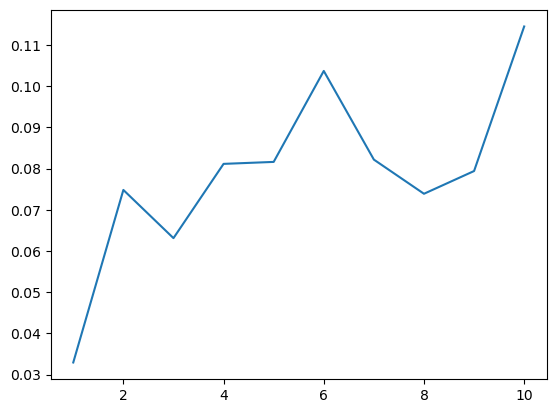

In [13]:
import matplotlib.pyplot as plt

plt.plot(vw_issuance.get_column("qcut").to_numpy(), vw_issuance.get_column("ExRet").to_numpy())
plt.show()